# Lab Task: Classification using Neural Networks in PyTorch (Iris Dataset)
### Objective:
In this task, you will build a neural network for classifying the Iris dataset. The task is divided into five clear parts.

## Dataset:
You will use the **Iris dataset** (available in `sklearn.datasets`). It has 4 features:
- `sepal length`
- `sepal width`
- `petal length`
- `petal width`

And 3 target classes:
- Setosa (0)
- Versicolour (1)
- Virginica (2)

## PART 1: Data Preprocessing

Perform the following steps:
1. Load the dataset using `sklearn.datasets.load_iris()`.
2. Convert it to a Pandas DataFrame.
3. Shuffle the dataset.
4. Check for missing values.
5. Normalize the feature columns using `StandardScaler`.
6. Split the data into **80% training** and **20% testing**.
7. Convert the data into PyTorch tensors.

In [62]:
# TODO BY STUDENTS: Import required libraries
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import torch

In [63]:
# TODO: Preprocess the Iris dataset step-by-step
iris = datasets.load_iris()

X = iris.data
y = iris.target

# Convert to DataFrame for visualization
df = pd.DataFrame(X, columns=iris.feature_names)
df['label'] = y
print(df.head())

# Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)



   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   label  
0      0  
1      0  
2      0  
3      0  
4      0  


## Feedforward Neural Network

Build a PyTorch neural network with the following architecture:

- Input Layer: 4 neurons
- Hidden Layer 1: 10 neurons + ReLU
- Output Layer: 3 neurons (no activation here, handled by loss function)

Use `nn.CrossEntropyLoss()` as the loss function.

In [64]:
# model with architecture
import torch.nn as nn
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # your code here
        self.fc1 = nn.Linear(4, 10)  # Input to hidden layer
        self.fc2 = nn.Linear(10, 3)  # Hidden to output layer

    def forward(self, x):
        # your code here
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

model_1 = Net()

## PART 2: Modify Architecture

Update your model as follows:
- Input Layer: 4 neurons (unchanged)
- Hidden Layer 1: 16 neurons + ReLU
- Hidden Layer 2: 8 neurons + ReLU
- Output Layer: 3 neurons

In [65]:
# TODO: Modify model to have two hidden layers
class NetModified(nn.Module):
    def __init__(self):
        super(NetModified, self).__init__()
        # your code here
        self.fc1 = nn.Linear(4, 16)  # Input to hidden layer 1
        self.fc2 = nn.Linear(16, 8)  # Hidden layer 1 to hidden layer 2
        self.fc3 = nn.Linear(8, 3)  # Hidden to output layer

    def forward(self, x):
        # your code here
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

model_2 = NetModified()

## PART 3: Apply Optimizer and Train models

Use the following settings:
- Optimizer: **Adam**
- Learning Rate: `0.01`
- Number of Epochs: `300`

Train the updated model and log loss.

Epoch [10/300], Loss: 0.8977
Epoch [20/300], Loss: 0.6519
Epoch [30/300], Loss: 0.4881
Epoch [40/300], Loss: 0.3822
Epoch [50/300], Loss: 0.3007
Epoch [60/300], Loss: 0.2343
Epoch [70/300], Loss: 0.1824
Epoch [80/300], Loss: 0.1448
Epoch [90/300], Loss: 0.1189
Epoch [100/300], Loss: 0.1017
Epoch [110/300], Loss: 0.0898
Epoch [120/300], Loss: 0.0811
Epoch [130/300], Loss: 0.0748
Epoch [140/300], Loss: 0.0701
Epoch [150/300], Loss: 0.0665
Epoch [160/300], Loss: 0.0634
Epoch [170/300], Loss: 0.0609
Epoch [180/300], Loss: 0.0588
Epoch [190/300], Loss: 0.0569
Epoch [200/300], Loss: 0.0553
Epoch [210/300], Loss: 0.0540
Epoch [220/300], Loss: 0.0529
Epoch [230/300], Loss: 0.0519
Epoch [240/300], Loss: 0.0510
Epoch [250/300], Loss: 0.0503
Epoch [260/300], Loss: 0.0496
Epoch [270/300], Loss: 0.0490
Epoch [280/300], Loss: 0.0484
Epoch [290/300], Loss: 0.0479
Epoch [300/300], Loss: 0.0474


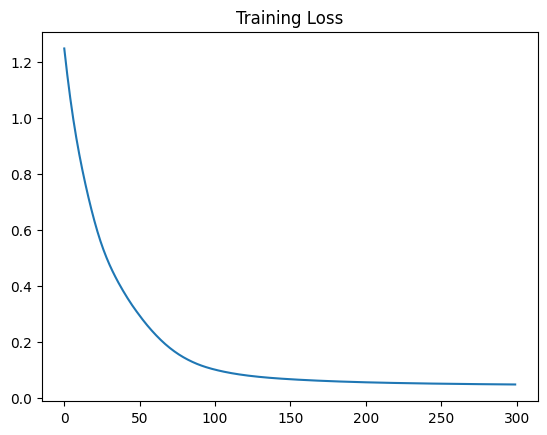

In [66]:
  # TODO: Train the model and plot loss (for model_1)
  import torch.optim as optim
  import matplotlib.pyplot as plt

  # Your code here
  loss_fn = nn.CrossEntropyLoss()
  optimizer = optim.Adam(model_1.parameters(), lr=0.01)

  losses = []
  epochs = 300
  for epoch in range(epochs):
      y_pred = model_1(X_train_tensor)
      loss = loss_fn(y_pred, y_train_tensor)
      losses.append(loss.item())
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()
      if (epoch + 1) % 10 == 0:
          print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}")


  plt.plot(losses)
  plt.title('Training Loss')
  plt.show()

Epoch [10/300], Loss: 0.7729
Epoch [20/300], Loss: 0.5054
Epoch [30/300], Loss: 0.3295
Epoch [40/300], Loss: 0.2193
Epoch [50/300], Loss: 0.1254
Epoch [60/300], Loss: 0.0788
Epoch [70/300], Loss: 0.0608
Epoch [80/300], Loss: 0.0539
Epoch [90/300], Loss: 0.0505
Epoch [100/300], Loss: 0.0485
Epoch [110/300], Loss: 0.0471
Epoch [120/300], Loss: 0.0461
Epoch [130/300], Loss: 0.0451
Epoch [140/300], Loss: 0.0441
Epoch [150/300], Loss: 0.0431
Epoch [160/300], Loss: 0.0420
Epoch [170/300], Loss: 0.0408
Epoch [180/300], Loss: 0.0396
Epoch [190/300], Loss: 0.0384
Epoch [200/300], Loss: 0.0372
Epoch [210/300], Loss: 0.0358
Epoch [220/300], Loss: 0.0344
Epoch [230/300], Loss: 0.0327
Epoch [240/300], Loss: 0.0307
Epoch [250/300], Loss: 0.0285
Epoch [260/300], Loss: 0.0263
Epoch [270/300], Loss: 0.0239
Epoch [280/300], Loss: 0.0213
Epoch [290/300], Loss: 0.0186
Epoch [300/300], Loss: 0.0160


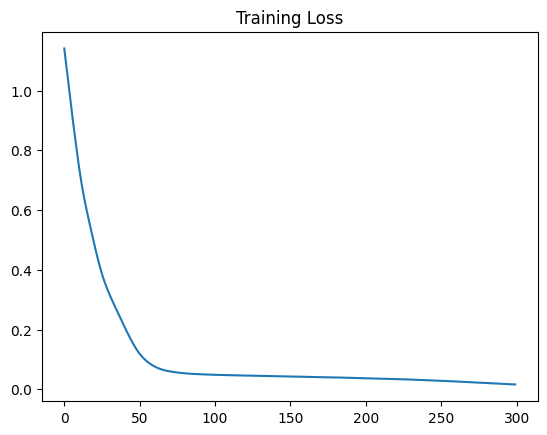

In [67]:
# TODO: Train the model and plot loss (for model_2)
import torch.optim as optim
import matplotlib.pyplot as plt

# Your code here
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_2.parameters(), lr=0.01)

losses = []
epochs = 300
for epoch in range(epochs):
    y_pred = model_2(X_train_tensor)
    loss = loss_fn(y_pred, y_train_tensor)
    losses.append(loss.item())
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}")


plt.plot(losses)
plt.title('Training Loss')
plt.show()

## Evaluation of the Models

### **For model_1**

In [68]:
# TODO: Predict and calculate accuracy
from sklearn.metrics import accuracy_score, confusion_matrix

# your code here
with torch.no_grad():
    y_test_pred = model_1(X_test_tensor)
    _, predicted = torch.max(y_test_pred, 1)

# Convert to NumPy arrays
y_pred_np = predicted.cpu().numpy()
y_true_np = y_test_tensor.cpu().numpy()

# Calculate metrics
acc = accuracy_score(y_true_np, y_pred_np)
cm = confusion_matrix(y_true_np, y_pred_np)

print(f'Accuracy: {acc * 100:.2f}%')
print(cm)


Accuracy: 100.00%
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


## **For model_2**

In [69]:
2# TODO: Predict and calculate accuracy
from sklearn.metrics import accuracy_score, confusion_matrix

# your code here
with torch.no_grad():
    y_test_pred = model_2(X_test_tensor)
    _, predicted = torch.max(y_test_pred, 1)

# Convert to NumPy arrays
y_pred_np = predicted.cpu().numpy()
y_true_np = y_test_tensor.cpu().numpy()

# Calculate metrics
acc = accuracy_score(y_true_np, y_pred_np)
cm = confusion_matrix(y_true_np, y_pred_np)

print(f'Accuracy: {acc * 100:.2f}%')
print(cm)



Accuracy: 96.67%
[[10  0  0]
 [ 0  9  0]
 [ 0  1 10]]
